In [139]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import pandas as pd 

# One Hot Encoder



In [140]:
data=[{'price':850000,'rooms':4,'neighborhood':'Queen Anne'},
                {'price':700000,'rooms':3,'neighborhood':'Fremont'},
                {'price':650000,'rooms':2,'neighborhood':'Wallingford'},
                {'price':860000,'rooms':1,'neighborhood':'Fremont'}]

In [141]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      2],
       [     1,      0,      0, 860000,      1]])

In [142]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [143]:
vec=DictVectorizer(sparse=True,dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

# Text Features

In [144]:
sample=['problem of evil',
        'evil queen',
        'horizon problem']

In [145]:
from sklearn.feature_extraction.text import CountVectorizer

In [146]:
vec=CountVectorizer()
X=vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [147]:
X.toarray()

array([[1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0]], dtype=int64)

In [148]:
vec.get_feature_names()

['evil', 'horizon', 'of', 'problem', 'queen']

In [149]:
X.shape

(3, 5)

In [150]:
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
X=vec.fit_transform(sample)
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Derived Features


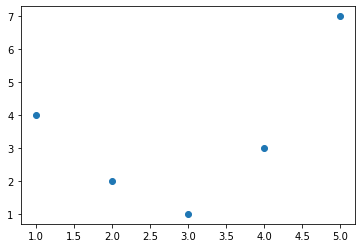

In [152]:
x=np.array([1,2,3,4,5])
y=np.array([4,2,1,3,7])
plt.scatter(x,y)

In [153]:
from sklearn.linear_model import LinearRegression
X=x[:,np.newaxis]
model=LinearRegression().fit(X,y)

In [154]:
x

array([1, 2, 3, 4, 5])

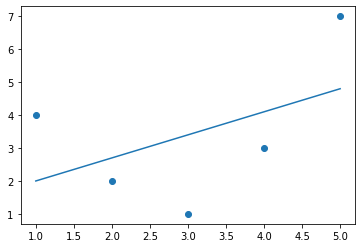

In [155]:
yfit=model.predict(X)
plt.scatter(X,y)
plt.plot(x,yfit);

In [156]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4,include_bias=False)
X2=poly.fit_transform(X)

In [157]:
X2

array([[  1.,   1.,   1.,   1.],
       [  2.,   4.,   8.,  16.],
       [  3.,   9.,  27.,  81.],
       [  4.,  16.,  64., 256.],
       [  5.,  25., 125., 625.]])

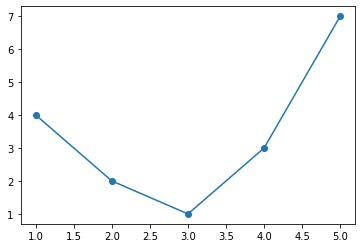

In [158]:
model=LinearRegression().fit(X2,y)
yfit=model.predict(X2)
plt.scatter(x,y)
plt.plot(x,yfit);

In [159]:
yfit

array([4., 2., 1., 3., 7.])

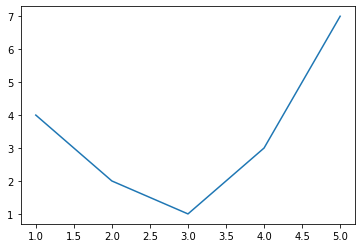

In [160]:
plt.plot(x,yfit)

# Imputation of Missing Data


In [164]:
from numpy import nan

In [168]:
X=np.array([[nan,0,3],
            [2,0,3],
            [3,2,3],
            [5,nan,3],
            [3,2,3]







])

In [167]:
X

array([[nan,  0.,  3.],
       [ 2.,  0.,  3.],
       [ 3.,  2.,  3.],
       [ 5., nan,  3.]])

In [169]:
y=np.array([14,16,-1,8,-5])

In [173]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
X2=imp.fit_transform(X)


array([[3.25, 0.  , 3.  ],
       [2.  , 0.  , 3.  ],
       [3.  , 2.  , 3.  ],
       [5.  , 1.  , 3.  ],
       [3.  , 2.  , 3.  ]])

In [175]:
X2=np.array([[3.25, 0.  , 3.  ],
       [2.  , 0.  , 3.  ],
       [3.  , 2.  , 3.  ],
       [5.  , 1.  , 3.  ],
       [3.  , 2.  , 3.  ]])
y=np.array([14,16,-1,8,-5])

model=LinearRegression().fit(X2,y)
y_model=model.predict(X2)

In [187]:
# Define the column of x to plot against y and predicted y
x_col = 0

# Generate the x values for the line plot of predicted y
x2 = np.linspace(x[:, x_col].min(), x[:, x_col].max(), 100).reshape(-1, 1)
X2 = np.zeros((x2.shape[0], x.shape[1]))
X2[:, x_col] = x2[:, 0]

# Calculate the predicted y values
y_model = model.predict(X2)

# Plot the actual y values and predicted y values against the chosen x column
plt.scatter(x[:, x_col], y, label='actual y')
plt.plot(x2[:, 0], y_model, label='predicted y')
plt.xlabel(f'x[{x_col}]')
plt.ylabel('y')
plt.legend()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

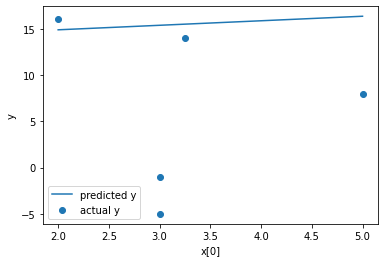

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the data
x = np.array([[3.25, 0., 3.],
              [2., 0., 3.],
              [3., 2., 3.],
              [5., 1., 3.],
              [3., 2., 3.]])
y = np.array([14, 16, -1, 8, -5])

# Fit the linear regression model
model = LinearRegression().fit(x, y)

# Define the column of x to plot against y and predicted y
x_col = 0

# Generate the x values for the line plot of predicted y
x2 = np.linspace(x[:, x_col].min(), x[:, x_col].max(), 100).reshape(-1, 1)
X2 = np.zeros((x2.shape[0], x.shape[1]))
X2[:, x_col] = x2[:, 0]

# Calculate the predicted y values
y_model = model.predict(X2)

# Plot the actual y values and predicted y values against the chosen x column
plt.scatter(x[:, x_col], y, label='actual y')
plt.plot(x2[:, 0], y_model, label='predicted y')
plt.xlabel(f'x[{x_col}]')
plt.ylabel('y')
plt.legend()
plt.show()
